<a href="https://colab.research.google.com/github/Trailblazer29/Breast-Cancer-Detection/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Breast Cancer Diagnosis</center></h1>

In this use case, we will explore the **Breast Cancer Wisconsin Dataset** and ultimately build a predictive model to classify a cell as being **Malignant (M/0)** or **Benign (B/1)**.

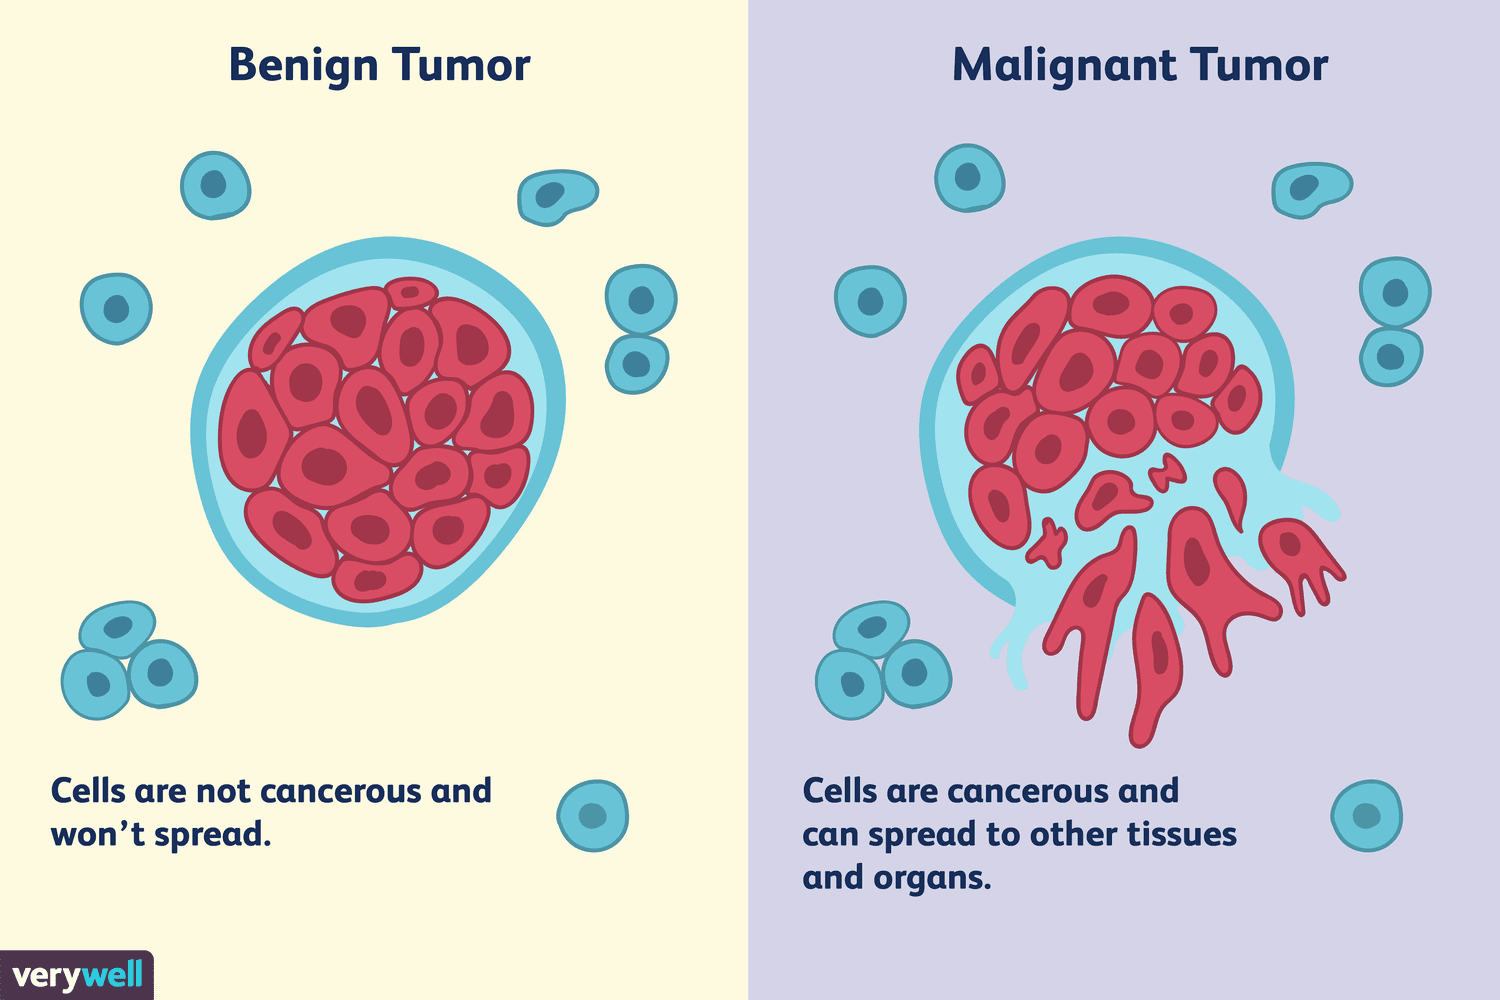
*Source: https://www.verywellhealth.com/what-does-malignant-and-benign-mean-514240*


The dataset can be accessed and downloaded through the following URL: https://kaggle.com/datasets/uciml/breast-cancer-wisconsin-data. Note that it can also be imported from the scikit-learn library.

It is worthy to mention that the Breast Cancer Wisconsin dataset was derived using the **Fine Needle Aspiration (FNA)** biopsy procedure.

 # Exploratory Data Analysis

In [26]:
# Import libraries & dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from google.colab import files

In [27]:
# Load dataset from sklearn
bc_data = sklearn.datasets.load_breast_cancer()

In [28]:
# Dataset Keys
print(bc_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [29]:
# Dataset Description
print(bc_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [30]:
# Data
print(bc_data.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [31]:
# Output Values
print(np.unique(bc_data.target))

[0 1]


In [32]:
# Output Names
print(bc_data.target_names)

['malignant' 'benign']


🔍 We can infer from the **target_names** key that **0** corresponds to **Malignant** cases and **1** corresponds to **Benign** ones.

In [33]:
# Convert dataset from numpy array to data frame
bc_data_df = pd.DataFrame(data = bc_data.data, columns = bc_data.feature_names)

Let's have a glimpse of the dataset:

In [34]:
bc_data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We should add the output "target" to the dataset.

In [35]:
# Add the "target" output column to the data frame
bc_data_df['label'] = bc_data.target

In [36]:
bc_data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [37]:
# Data summary
bc_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

✍ The following can be noticed:
*   The are 569 observations, 30 input features and the output (0 for Malignant cell and 1 for Benign cell).
*   All features are numerical and have no missing values.

## Drop highly correlated features

One feature from each feature pair that has a correlation between -1 and -0.95 or 0.95 and 1 will be dropped.

In [38]:
# Pearson Correlation Matrix
corr_matrix = bc_data_df.corr()
print(corr_matrix)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

In [39]:
# Get upper triangle of correlation matrix with absolute values
upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).abs()

In [40]:
# Show highly correlated variables (positively & negatively) in pairs
corr_threshold = 0.95
i = 1
for index, value in upper_corr_matrix.unstack().sort_values(ascending=False).items():
  if value > corr_threshold:
    print(i, ". Correlation (", index[0], ", ", index[1], ") = ", value)
    i+=1

1 . Correlation ( mean perimeter ,  mean radius ) =  0.9978552814938109
2 . Correlation ( worst perimeter ,  worst radius ) =  0.993707916102949
3 . Correlation ( mean area ,  mean radius ) =  0.9873571700566127
4 . Correlation ( mean area ,  mean perimeter ) =  0.9865068039913907
5 . Correlation ( worst area ,  worst radius ) =  0.9840145644590742
6 . Correlation ( worst area ,  worst perimeter ) =  0.9775780914063871
7 . Correlation ( perimeter error ,  radius error ) =  0.9727936770160764
8 . Correlation ( worst perimeter ,  mean perimeter ) =  0.9703868870426394
9 . Correlation ( worst radius ,  mean radius ) =  0.9695389726112055
10 . Correlation ( worst radius ,  mean perimeter ) =  0.9694763634663146
11 . Correlation ( worst perimeter ,  mean radius ) =  0.9651365139559871
12 . Correlation ( worst radius ,  mean area ) =  0.9627460860470841
13 . Correlation ( worst area ,  mean area ) =  0.9592133256498998
14 . Correlation ( worst perimeter ,  mean area ) =  0.9591195743552645
1

In [41]:
# Columns to drop
to_drop = [column for column in upper_corr_matrix.columns if any(upper_corr_matrix[column] > corr_threshold)]

In [44]:
bc_data_df.drop(to_drop, axis=1, inplace=True)

## Remove Duplicated Records

In [45]:
print(bc_data_df.duplicated().value_counts())

False    569
dtype: int64


There are no duplicates in the dataset.

Let's have a look at the data summary statistics:

In [46]:
bc_data_df.describe()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,...,0.020542,0.003795,25.677223,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,...,0.008266,0.002646,6.146258,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,...,0.007882,0.000895,12.020000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,...,0.015160,0.002248,21.080000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,...,0.018730,0.003187,25.410000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,...,0.023480,0.004558,29.720000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,...,0.078950,0.029840,49.540000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


❗ We can notice a big gap in features' value intervals. Hence, we will scale the whole dataset accroding to the **Min-Max Normalization** method (range between 0 and 1).

In [48]:
# Min-Max Normalization
data_inputs = bc_data_df.drop(columns="label", axis=1)
output = bc_data_df["label"]
features = data_inputs.columns

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_inputs)
bc_data_df = pd.DataFrame(data = scaled_data, columns = features)
bc_data_df["label"] = output

bc_data_df.describe()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,0.106345,0.189324,...,0.178143,0.100193,0.363998,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.627417
std,0.166787,0.145453,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,0.100421,0.121917,...,0.116316,0.091417,0.163813,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,0.043781,0.104690,...,0.102409,0.046750,0.241471,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000
50%,0.302381,0.308759,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,0.077023,0.165267,...,0.152643,0.079191,0.356876,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,1.000000
75%,0.416442,0.408860,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,0.133044,0.246155,...,0.219480,0.126556,0.471748,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Distribution of the Target variable
target_dist = bc_data_df['label'].value_counts()
print(target_dist)

1    357
0    212
Name: label, dtype: int64


<BarContainer object of 2 artists>

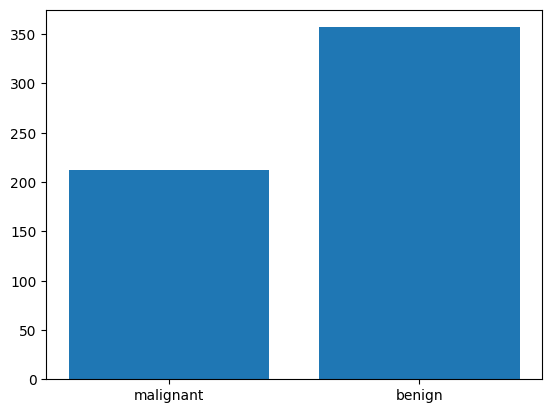

In [64]:
target_dist = [target_dist[1], target_dist[0]]
plt.bar(bc_data.target_names, target_dist)

In [65]:
print(bc_data_df.groupby('label').mean())

       mean radius  mean texture  mean smoothness  mean compactness  \
label                                                                 
0         0.496087      0.402263         0.453810          0.385890   
1         0.244476      0.277469         0.359733          0.186199   

       mean concavity  mean concave points  mean symmetry  \
label                                                       
0            0.376698             0.437326       0.438934   
1            0.107914             0.127820       0.344374   

       mean fractal dimension  radius error  texture error  ...  \
label                                                       ...   
0                    0.267904      0.180186       0.188012  ...   
1                    0.271849      0.062496       0.190103  ...   

       concave points error  symmetry error  fractal dimension error  \
label                                                                  
0                  0.285290        0.177160              

💡 We can notice that the average/mean value for most features is greater for Malignant cells than Benign.

# Data Processing

## Model Building

In [66]:
# Separate the input features from the target
X = bc_data_df.drop(columns='label', axis=1)
y = bc_data_df['label']

In [67]:
# Split the dataset into training & testing sets with a 70%-30% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [68]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

### Accuracy

In [69]:
# Model accuracy on training data
y_train_predicted = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_predicted)

# Model accuracy on testing data
y_test_predicted = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_predicted)

In [70]:
print("Accuracy on training data: ", round(training_accuracy*100, 2),"%")
print("Accuracy on testing data: ", round(testing_accuracy*100, 2), "%")

Accuracy on training data:  96.48 %
Accuracy on testing data:  95.91 %


### Specificity

In [71]:
conf_matrix = confusion_matrix(y_test, y_test_predicted)
print(conf_matrix)

[[ 61   6]
 [  1 103]]


In [72]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn+fp)
print("Specificity: ", round(specificity*100, 2), "%")

Specificity:  91.04 %


### Sensitivity

In [73]:
sensitivity = tp / (tp+fn)
print("Sensitivity: ", round(sensitivity*100, 2), "%")

Sensitivity:  99.04 %


# Model Prediction

In [74]:
filename = next(iter(files.upload()))

Saving breast_cancer_features.xlsx to breast_cancer_features.xlsx


In [77]:
cancer_data = pd.read_excel("/content/" + filename)

In [78]:
# Drop features as per the model's input features
trimmed_cancer_data = cancer_data[~cancer_data["Feature"].isin(to_drop)]

In [86]:
feature_values = np.asarray(trimmed_cancer_data["Value"])
feature_values = feature_values.reshape(1, -1)
prediction = model.predict(feature_values)
print(bc_data.target_names[prediction][0])

malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
